<a href="https://colab.research.google.com/github/pkams/projetos_iniciais/blob/master/classificando_sinais_de_transito(arquitetura_de_redes_convolucionais).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Utilizando uma arquitetura pronta LeNet como base na construção da rede
# convolucional

In [0]:
# Layer convolucional:
# Tamanho(ex: 32x32) - MatrixConv(5x5) + 1/(Stride) = 28
# Stride = o quanto a matriz desloca 

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

import os
import PIL
import pickle
import zipfile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/original.zip'

zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()


In [0]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)



  # usamos pickle pq esta como .p

In [5]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [6]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [0]:
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
X_test.shape

(12630, 32, 32, 3)

In [12]:
X_valid.shape

(4410, 32, 32, 3)

1

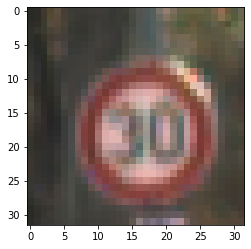

In [13]:
# Visualizar

i = 3100
plt.imshow(X_train[i])
y_train[i]

29

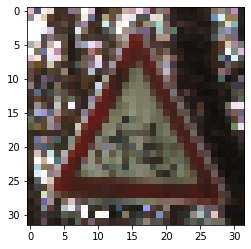

In [14]:
# Visualizar

i = 2100
plt.imshow(X_test[i])
y_test[i]

8

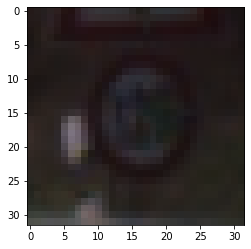

In [15]:
# Visualizar

i = 2100
plt.imshow(X_valid[i])
y_valid[i]

In [0]:
# Preparação dos dados

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [0]:
# Estão coloridos, queremos mudar de 3 canais para 1 canal
# Média do RGB e temos a escala de cinza

X_train_gray = np.sum(X_train/3, axis = 3, keepdims =True) 
X_test_gray = np.sum(X_test/3, axis = 3, keepdims =True) 
X_valid_gray = np.sum(X_valid/3, axis = 3, keepdims =True) 

#canal é eixo 3, keepdims não bagunça as dimensões

In [19]:
X_train_gray.shape, X_test_gray.shape, X_valid_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [0]:
# Normalização!

X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_valid_gray_norm = (X_valid_gray - 128) / 128

# 128 é metade de 256, é outra maneira de fazer norm
# Se quiser padronização divide por 255

In [21]:
np.max(X_train_gray_norm)

0.9921875

In [22]:
np.min(X_train_gray_norm)

-0.9713541666666666

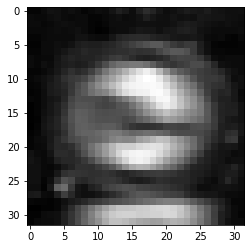

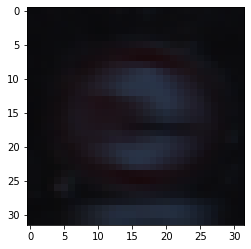

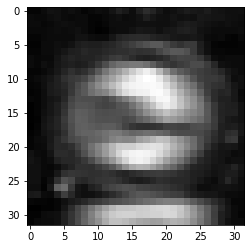

In [28]:
# Avaliando as transformações em escala cinza, normal e normalizada

i = 60

plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

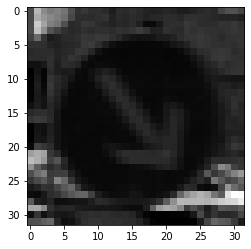

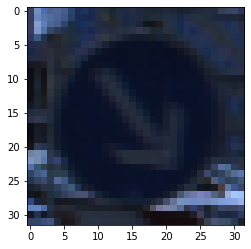

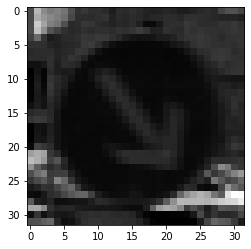

In [29]:
i = 60

plt.imshow(X_test_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap='gray')

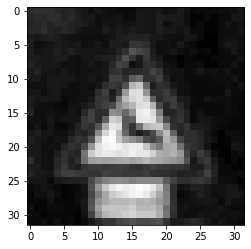

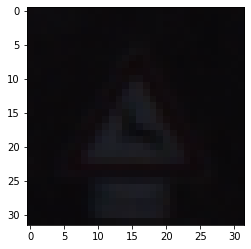

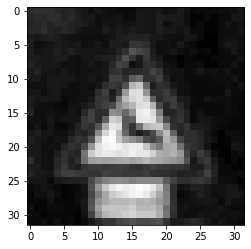

In [30]:
i = 60

plt.imshow(X_valid_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_valid[i])
plt.figure()
plt.imshow(X_valid_gray_norm[i].squeeze(), cmap='gray')

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [36]:
LeNet = tf.keras.models.Sequential()

LeNet.add(tf.keras.layers.Conv2D(6,(5,5),activation='relu', input_shape=(32,32,1)))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Conv2D(16,(5,5),activation='relu'))
LeNet.add(tf.keras.layers.AveragePooling2D())

LeNet.add(tf.keras.layers.Flatten())

LeNet.add(tf.keras.layers.Dense(120, activation='relu'))

LeNet.add(tf.keras.layers.Dense(43, activation='softmax'))

LeNet.summary()

# MaxPooling pega o máximo
# AVG Pooling pega a média

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 43)               

In [0]:
# Ex do primeiro layer: (batch_size, 28, 28, 6 filtros)
# Temos 32x32 no começo que seriam 1024 pixels. Mas vemos que após processamento 
# temos 400 pixels apenas.

In [0]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = LeNet.fit(X_train_gray_norm, 
                    y_train, 
                    batch_size=500, 
                    epochs=50,
                    validation_data=(X_valid_gray_norm, y_valid))

Epoch 1/50
70/70 [==============================] - 1s 13ms/step - loss: 0.0511 - accuracy: 0.9886 - val_loss: 0.6451 - val_accuracy: 0.8760
Epoch 2/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0576 - accuracy: 0.9848 - val_loss: 0.6303 - val_accuracy: 0.8803
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0483 - accuracy: 0.9886 - val_loss: 0.6497 - val_accuracy: 0.8726
Epoch 4/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0415 - accuracy: 0.9905 - val_loss: 0.6556 - val_accuracy: 0.8803
Epoch 5/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0392 - accuracy: 0.9913 - val_loss: 0.6115 - val_accuracy: 0.8776
Epoch 6/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0360 - accuracy: 0.9926 - val_loss: 0.6584 - val_accuracy: 0.8757
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0375 - accuracy: 0.9914 - val_loss: 0.7031 - val_accuracy: 0.8694
Epoch 8/50
70

In [44]:
LeNet.evaluate(X_test_gray_norm, y_test)

395/395 [==============================] - 1s 3ms/step - loss: 1.2205 - accuracy: 0.8852


[1.2205393314361572, 0.8851940035820007]

In [0]:
# Recomenda-se observar papers para entender arquiteturas que ja foram 
# utilizadas, sem precisar criar nada do zero.

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

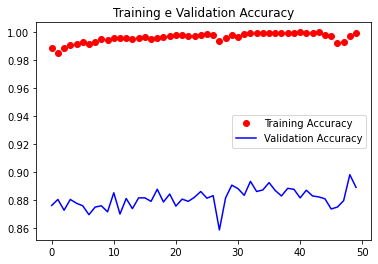

In [52]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color='red', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training e Validation Accuracy')
plt.legend()

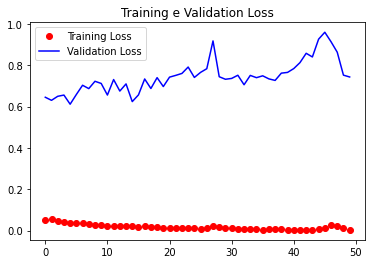

In [53]:
plt.plot(epochs, loss, 'bo', color='red', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training e Validation Loss')
plt.legend()

In [54]:
predicted_classes = LeNet.predict_classes(X_test_gray_norm)
y_true = y_test

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


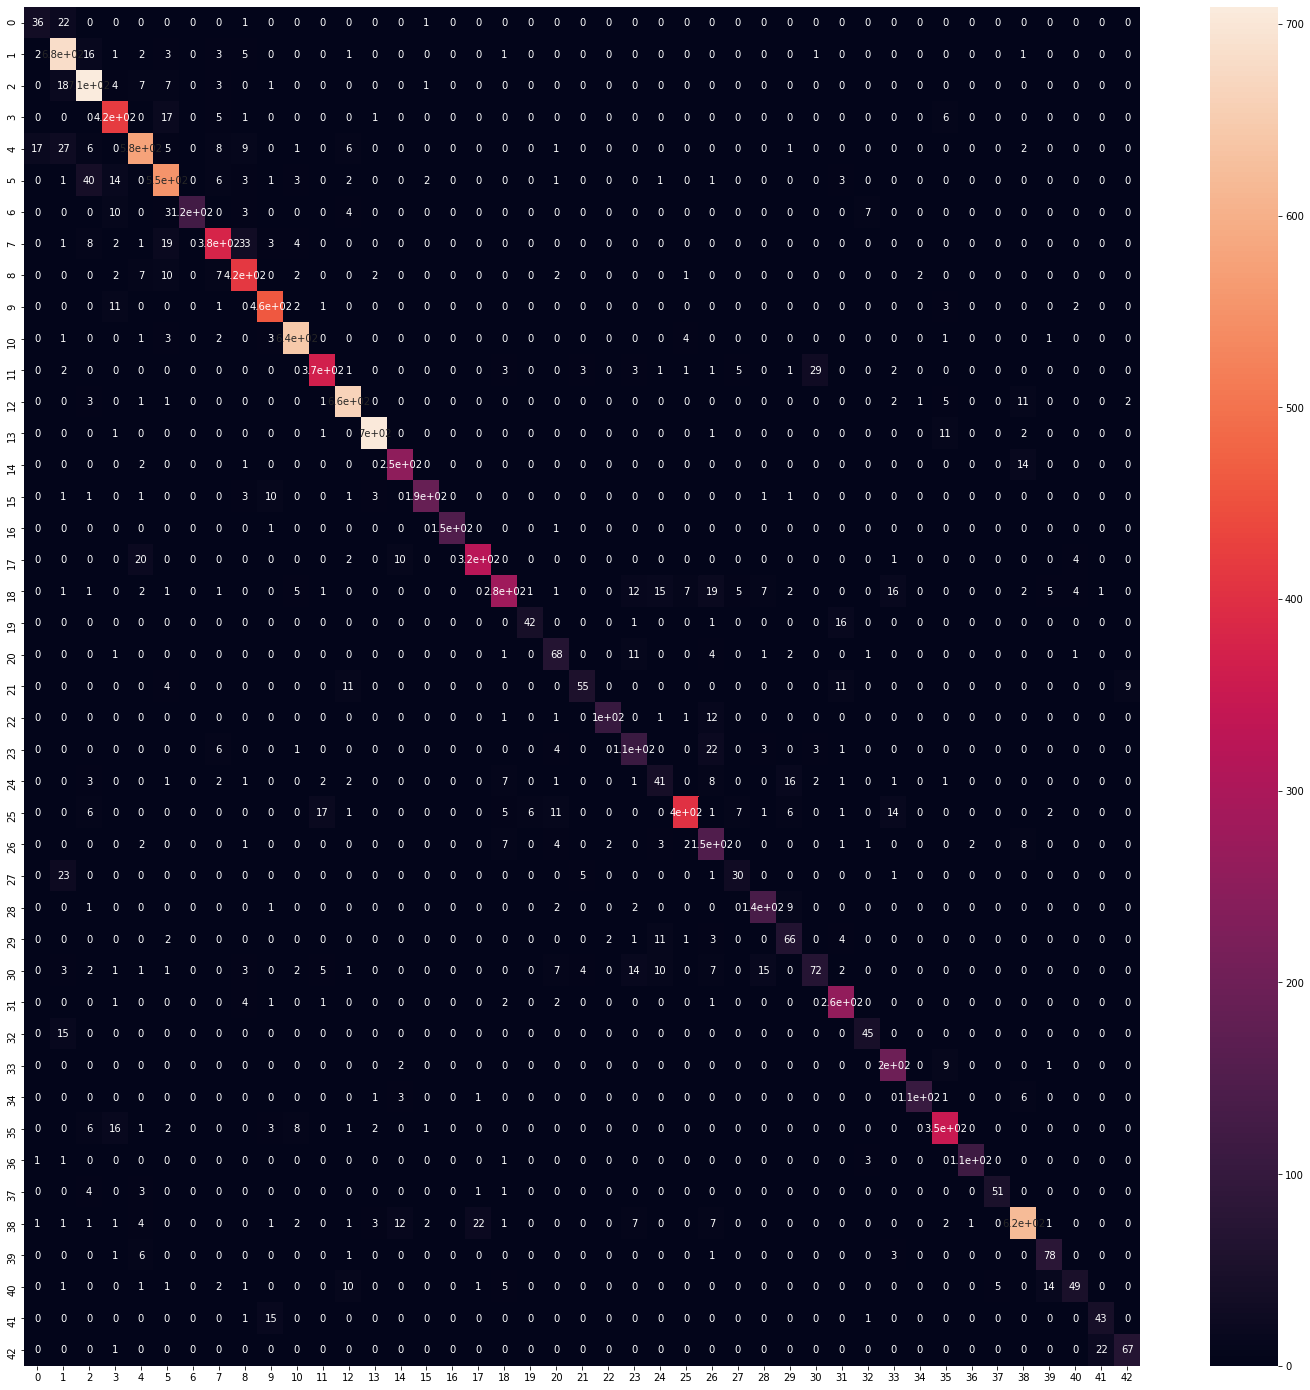

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize=(25,25))

sns.heatmap(cm, annot=True)

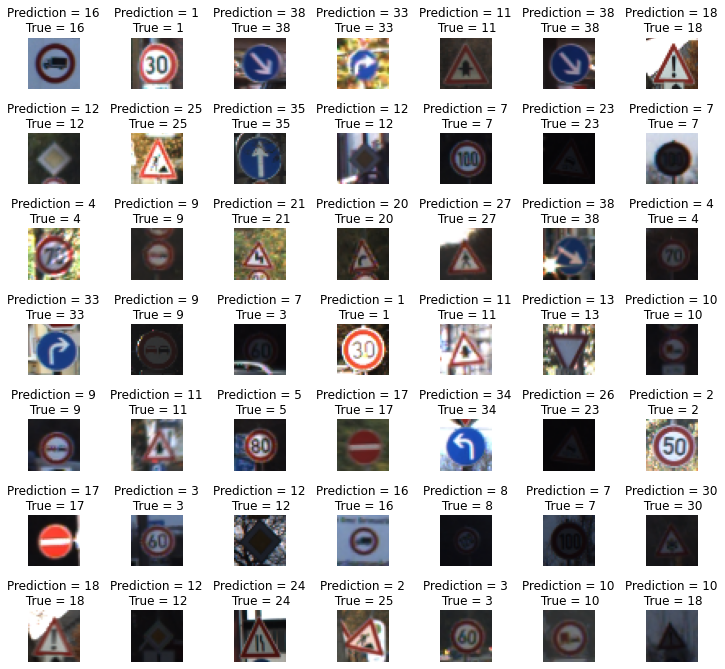

In [59]:
# Observar valores previstos x verdadeiros em alguns exemplos

L = 7
W = 7

fig, axes = plt.subplots(L,W, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [72]:
from sklearn.metrics import classification_report

print(classification_report(predicted_classes, y_true))

              precision    recall  f1-score   support

           0       0.60      0.63      0.62        57
           1       0.95      0.85      0.90       802
           2       0.95      0.88      0.91       807
           3       0.93      0.86      0.90       487
           4       0.87      0.90      0.89       639
           5       0.88      0.87      0.87       632
           6       0.82      1.00      0.90       123
           7       0.84      0.89      0.87       425
           8       0.92      0.86      0.89       485
           9       0.96      0.92      0.94       500
          10       0.98      0.96      0.97       674
          11       0.88      0.93      0.90       397
          12       0.96      0.94      0.95       708
          13       0.98      0.98      0.98       716
          14       0.94      0.90      0.92       280
          15       0.90      0.96      0.93       195
          16       0.99      1.00      0.99       148
          17       0.90    

In [0]:
# Podemos notar que algumas placas tem um F1-Score muito bom, sendo classificadas corretamente
# Outras tem F1-Score perto dos 0.60, o que pode ser considerado ruim.
# Poderiamos tentar outras estratégias e técnicas para melhorar a rede e as classificações.